In [1]:
import config
import torch
import numpy as np
import matplotlib.pyplot as plt
from dataset import get_dataloader
from torchsummary import summary
from model import Yolov1
from loss import YoloLoss
from train import train_fn

In [2]:
# !python preprocessing_data.py

In [3]:
train_loader, val_loader, test_loader = get_dataloader()
loss_fn = YoloLoss(num_grids=config.NUM_GRIDS, num_boxes=config.NUM_BOXES, num_classes=config.NUM_CLASSES)
model = Yolov1(
    in_channels=3, num_grids=config.NUM_GRIDS, num_boxes=config.NUM_BOXES, num_classes=config.NUM_CLASSES
).to(config.DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr=config.LR, weight_decay=config.WEIGHT_DECAY)

In [4]:
summary(model.to(config.DEVICE), (3, 448, 448))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           9,408
       BatchNorm2d-2         [-1, 64, 224, 224]             128
         LeakyReLU-3         [-1, 64, 224, 224]               0
         ConvBlock-4         [-1, 64, 224, 224]               0
         MaxPool2d-5         [-1, 64, 112, 112]               0
            Conv2d-6        [-1, 192, 112, 112]         110,592
       BatchNorm2d-7        [-1, 192, 112, 112]             384
         LeakyReLU-8        [-1, 192, 112, 112]               0
         ConvBlock-9        [-1, 192, 112, 112]               0
        MaxPool2d-10          [-1, 192, 56, 56]               0
           Conv2d-11          [-1, 128, 56, 56]          24,576
      BatchNorm2d-12          [-1, 128, 56, 56]             256
        LeakyReLU-13          [-1, 128, 56, 56]               0
        ConvBlock-14          [-1, 128,

# TRAINING

In [5]:
mean_losses, list_best_mAP = train_fn(model, train_loader, val_loader, optimizer, loss_fn, calc_mAP_freq=25)

Start epoch:  0


100%|██████████| 88/88 [00:36<00:00,  2.40it/s, loss=tensor(5.2411, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 19.420505293390967
Start epoch:  1


100%|██████████| 88/88 [00:35<00:00,  2.50it/s, loss=tensor(2.5787, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 9.82152684032917
Start epoch:  2


100%|██████████| 88/88 [00:35<00:00,  2.49it/s, loss=tensor(2.5389, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 9.600633277134461
Start epoch:  3


100%|██████████| 88/88 [00:36<00:00,  2.44it/s, loss=tensor(5.1172, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 8.396358752792532
Start epoch:  4


100%|██████████| 88/88 [00:37<00:00,  2.37it/s, loss=tensor(0.5108, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 7.733696189116348
Start epoch:  5


100%|██████████| 88/88 [00:41<00:00,  2.13it/s, loss=tensor(2.1649, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 6.518789315765554
Start epoch:  6


100%|██████████| 88/88 [00:38<00:00,  2.30it/s, loss=tensor(4.4341, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 7.078851894898848
Start epoch:  7


100%|██████████| 88/88 [00:38<00:00,  2.29it/s, loss=tensor(3.0295, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 6.168250391429121
Start epoch:  8


100%|██████████| 88/88 [00:38<00:00,  2.30it/s, loss=tensor(3.0593, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 4.678858429193497
Start epoch:  9


100%|██████████| 88/88 [00:40<00:00,  2.16it/s, loss=tensor(0.9115, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 4.315140678123995
Start epoch:  10


100%|██████████| 88/88 [00:41<00:00,  2.11it/s, loss=tensor(6.6692, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 7.3077530562877655
Start epoch:  11


100%|██████████| 88/88 [00:40<00:00,  2.15it/s, loss=tensor(3.8332, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 5.79369233277711
Start epoch:  12


100%|██████████| 88/88 [00:39<00:00,  2.21it/s, loss=tensor(0.1522, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 5.224864069711078
Start epoch:  13


100%|██████████| 88/88 [00:39<00:00,  2.21it/s, loss=tensor(0.7687, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 3.6077787249603053
Start epoch:  14


100%|██████████| 88/88 [00:39<00:00,  2.23it/s, loss=tensor(1.9587, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 3.2527003276415845
Start epoch:  15


100%|██████████| 88/88 [00:39<00:00,  2.21it/s, loss=tensor(1.0654, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 3.008587761697444
Start epoch:  16


100%|██████████| 88/88 [00:38<00:00,  2.26it/s, loss=tensor(0.9458, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 2.8506823774765837
Start epoch:  17


100%|██████████| 88/88 [00:37<00:00,  2.34it/s, loss=tensor(0.3928, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 2.7739457388154487
Start epoch:  18


100%|██████████| 88/88 [00:38<00:00,  2.27it/s, loss=tensor(2.0928, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 3.163612985475497
Start epoch:  19


100%|██████████| 88/88 [00:38<00:00,  2.30it/s, loss=tensor(0.6071, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 2.4202737613496454
Start epoch:  20


100%|██████████| 88/88 [00:38<00:00,  2.30it/s, loss=tensor(1.4724, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 6.565668546679345
Start epoch:  21


100%|██████████| 88/88 [00:38<00:00,  2.30it/s, loss=tensor(3.0527, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 6.768894243646752
Start epoch:  22


100%|██████████| 88/88 [00:37<00:00,  2.32it/s, loss=tensor(0.1701, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 5.225740829652006
Start epoch:  23


100%|██████████| 88/88 [00:38<00:00,  2.29it/s, loss=tensor(1.3704, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 5.182082445106723
Start epoch:  24


100%|██████████| 88/88 [00:37<00:00,  2.33it/s, loss=tensor(1.0144, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 3.0904507294974546
Get boxes....
Compute mAP....
Val mAP: 0.35704535245895386
Save model
=> Saving checkpoint
Start epoch:  25


100%|██████████| 88/88 [00:38<00:00,  2.26it/s, loss=tensor(0.3855, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 2.5096426844935524
Start epoch:  26


100%|██████████| 88/88 [00:37<00:00,  2.32it/s, loss=tensor(3.2820, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 2.135676637630571
Start epoch:  27


100%|██████████| 88/88 [00:38<00:00,  2.30it/s, loss=tensor(0.5256, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 2.7388454059308227
Start epoch:  28


100%|██████████| 88/88 [00:38<00:00,  2.30it/s, loss=tensor(0.8469, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 2.262356187978929
Start epoch:  29


100%|██████████| 88/88 [00:38<00:00,  2.30it/s, loss=tensor(0.6989, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 1.7727609345350752
Start epoch:  30


100%|██████████| 88/88 [00:32<00:00,  2.74it/s, loss=tensor(1.0139, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 1.5629886713894932
Start epoch:  31


100%|██████████| 88/88 [00:37<00:00,  2.37it/s, loss=tensor(0.0389, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 1.482270325407047
Start epoch:  32


100%|██████████| 88/88 [00:38<00:00,  2.27it/s, loss=tensor(1.2783, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 1.309415506537665
Start epoch:  33


100%|██████████| 88/88 [00:38<00:00,  2.30it/s, loss=tensor(1.0096, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 1.2660538041964173
Start epoch:  34


100%|██████████| 88/88 [00:38<00:00,  2.26it/s, loss=tensor(0.5179, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 1.4638490080833435
Start epoch:  35


100%|██████████| 88/88 [00:38<00:00,  2.31it/s, loss=tensor(0.8510, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 1.7129181075671858
Start epoch:  36


100%|██████████| 88/88 [00:38<00:00,  2.29it/s, loss=tensor(0.3145, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 2.0847874668172817
Start epoch:  37


100%|██████████| 88/88 [00:38<00:00,  2.30it/s, loss=tensor(0.9210, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 1.7963810745965352
Start epoch:  38


100%|██████████| 88/88 [00:38<00:00,  2.31it/s, loss=tensor(0.6982, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 1.3365343261340803
Start epoch:  39


100%|██████████| 88/88 [00:38<00:00,  2.31it/s, loss=tensor(1.0794, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 1.320482717149637
Start epoch:  40


100%|██████████| 88/88 [00:38<00:00,  2.28it/s, loss=tensor(0.3778, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 1.9711215286092325
Start epoch:  41


100%|██████████| 88/88 [00:38<00:00,  2.31it/s, loss=tensor(0.3845, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 3.279347972097722
Start epoch:  42


100%|██████████| 88/88 [00:37<00:00,  2.33it/s, loss=tensor(2.5531, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 7.531089352951809
Start epoch:  43


100%|██████████| 88/88 [00:38<00:00,  2.29it/s, loss=tensor(0.4945, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 3.3257246054708958
Start epoch:  44


100%|██████████| 88/88 [00:38<00:00,  2.30it/s, loss=tensor(0.4505, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 2.643139164386825
Start epoch:  45


100%|██████████| 88/88 [00:38<00:00,  2.30it/s, loss=tensor(3.1307, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 2.456439773975448
Start epoch:  46


100%|██████████| 88/88 [00:38<00:00,  2.29it/s, loss=tensor(1.4569, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 1.8612836782227864
Start epoch:  47


100%|██████████| 88/88 [00:38<00:00,  2.29it/s, loss=tensor(0.1525, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 1.2284697098657489
Start epoch:  48


100%|██████████| 88/88 [00:38<00:00,  2.28it/s, loss=tensor(0.7422, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 1.273272337307307
Start epoch:  49


100%|██████████| 88/88 [00:38<00:00,  2.29it/s, loss=tensor(0.6445, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 2.8716377043588595
Get boxes....
Compute mAP....
Val mAP: 0.015866681933403015
Start epoch:  50


100%|██████████| 88/88 [00:38<00:00,  2.31it/s, loss=tensor(0.1543, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 3.522828582166271
Start epoch:  51


100%|██████████| 88/88 [00:38<00:00,  2.28it/s, loss=tensor(2.9182, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 2.2751015249470417
Start epoch:  52


100%|██████████| 88/88 [00:38<00:00,  2.29it/s, loss=tensor(0.4301, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 1.5009121754291384
Start epoch:  53


100%|██████████| 88/88 [00:38<00:00,  2.30it/s, loss=tensor(0.5789, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 1.1049927538260818
Start epoch:  54


100%|██████████| 88/88 [00:38<00:00,  2.29it/s, loss=tensor(0.4753, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 1.1539984693412075
Start epoch:  55


100%|██████████| 88/88 [00:38<00:00,  2.32it/s, loss=tensor(1.6948, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 1.1507448626851493
Start epoch:  56


100%|██████████| 88/88 [00:39<00:00,  2.26it/s, loss=tensor(3.5037, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 1.2927804369140754
Start epoch:  57


100%|██████████| 88/88 [00:38<00:00,  2.26it/s, loss=tensor(0.7390, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 1.2346770450134168
Start epoch:  58


100%|██████████| 88/88 [00:38<00:00,  2.28it/s, loss=tensor(0.5686, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 1.4445478326471692
Start epoch:  59


100%|██████████| 88/88 [00:38<00:00,  2.28it/s, loss=tensor(0.0396, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 1.1469024441797624
Start epoch:  60


100%|██████████| 88/88 [00:38<00:00,  2.26it/s, loss=tensor(0.0528, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.9684478672729298
Start epoch:  61


100%|██████████| 88/88 [00:38<00:00,  2.28it/s, loss=tensor(0.2504, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.992169738069854
Start epoch:  62


100%|██████████| 88/88 [00:38<00:00,  2.27it/s, loss=tensor(1.2862, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 1.1371710513803093
Start epoch:  63


100%|██████████| 88/88 [00:38<00:00,  2.30it/s, loss=tensor(0.3595, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.7886117150245066
Start epoch:  64


100%|██████████| 88/88 [00:38<00:00,  2.27it/s, loss=tensor(0.7056, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.6300390881740234
Start epoch:  65


100%|██████████| 88/88 [00:39<00:00,  2.23it/s, loss=tensor(0.0496, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.7787144715813074
Start epoch:  66


100%|██████████| 88/88 [00:39<00:00,  2.21it/s, loss=tensor(0.0497, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.8096965266052972
Start epoch:  67


100%|██████████| 88/88 [00:39<00:00,  2.23it/s, loss=tensor(0.0712, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.804681315086782
Start epoch:  68


100%|██████████| 88/88 [00:39<00:00,  2.24it/s, loss=tensor(0.9265, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.5211668623272668
Start epoch:  69


100%|██████████| 88/88 [00:52<00:00,  1.69it/s, loss=tensor(0.0215, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.42889603921635583
Start epoch:  70


100%|██████████| 88/88 [00:56<00:00,  1.56it/s, loss=tensor(0.0243, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.4388045826503499
Start epoch:  71


100%|██████████| 88/88 [00:56<00:00,  1.57it/s, loss=tensor(0.1072, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.6185771109197628
Start epoch:  72


100%|██████████| 88/88 [00:47<00:00,  1.86it/s, loss=tensor(0.2433, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 1.3224094825034791
Start epoch:  73


100%|██████████| 88/88 [00:39<00:00,  2.25it/s, loss=tensor(1.0293, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 1.1112360254099423
Start epoch:  74


100%|██████████| 88/88 [00:38<00:00,  2.28it/s, loss=tensor(1.9972, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.9575320505960421
Get boxes....
Compute mAP....
Val mAP: 0.6254937648773193
Save model
=> Saving checkpoint
Start epoch:  75


100%|██████████| 88/88 [00:38<00:00,  2.28it/s, loss=tensor(0.0178, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 1.0902245342096484
Start epoch:  76


100%|██████████| 88/88 [00:37<00:00,  2.32it/s, loss=tensor(0.6046, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.5703924608586187
Start epoch:  77


100%|██████████| 88/88 [00:42<00:00,  2.09it/s, loss=tensor(0.5333, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.44826846525327046
Start epoch:  78


100%|██████████| 88/88 [00:39<00:00,  2.23it/s, loss=tensor(0.9641, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.9195239690386436
Start epoch:  79


100%|██████████| 88/88 [00:38<00:00,  2.29it/s, loss=tensor(0.0998, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 2.30041690856557
Start epoch:  80


100%|██████████| 88/88 [00:38<00:00,  2.31it/s, loss=tensor(1.3675, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 2.3570575030012564
Start epoch:  81


100%|██████████| 88/88 [00:38<00:00,  2.28it/s, loss=tensor(0.2116, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 1.4222846164114096
Start epoch:  82


100%|██████████| 88/88 [00:38<00:00,  2.27it/s, loss=tensor(0.0696, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 1.6142321973192422
Start epoch:  83


100%|██████████| 88/88 [00:38<00:00,  2.28it/s, loss=tensor(0.2389, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 2.144590260630304
Start epoch:  84


100%|██████████| 88/88 [00:37<00:00,  2.32it/s, loss=tensor(0.0805, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 1.8324746492911468
Start epoch:  85


100%|██████████| 88/88 [00:38<00:00,  2.29it/s, loss=tensor(0.5939, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.9757613936777819
Start epoch:  86


100%|██████████| 88/88 [00:37<00:00,  2.32it/s, loss=tensor(0.2935, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.7792483514852144
Start epoch:  87


100%|██████████| 88/88 [00:38<00:00,  2.30it/s, loss=tensor(0.4580, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.7132961888670583
Start epoch:  88


100%|██████████| 88/88 [00:38<00:00,  2.27it/s, loss=tensor(1.5710, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 1.5671541928737
Start epoch:  89


100%|██████████| 88/88 [00:39<00:00,  2.25it/s, loss=tensor(0.2749, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 1.6969153804027222
Start epoch:  90


100%|██████████| 88/88 [00:38<00:00,  2.29it/s, loss=tensor(0.3423, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 1.1132955558767372
Start epoch:  91


100%|██████████| 88/88 [00:37<00:00,  2.33it/s, loss=tensor(0.1697, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 1.2817922680723397
Start epoch:  92


100%|██████████| 88/88 [00:38<00:00,  2.30it/s, loss=tensor(0.1348, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 1.0037098894827068
Start epoch:  93


100%|██████████| 88/88 [00:38<00:00,  2.27it/s, loss=tensor(0.3214, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.5171085415746678
Start epoch:  94


100%|██████████| 88/88 [00:38<00:00,  2.26it/s, loss=tensor(0.0639, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.5301834911065684
Start epoch:  95


100%|██████████| 88/88 [00:38<00:00,  2.28it/s, loss=tensor(0.0676, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.32417295542968944
Start epoch:  96


100%|██████████| 88/88 [00:38<00:00,  2.28it/s, loss=tensor(0.0501, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.23978303078646687
Start epoch:  97


100%|██████████| 88/88 [00:48<00:00,  1.80it/s, loss=tensor(0.3161, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.19798566663468425
Start epoch:  98


100%|██████████| 88/88 [00:49<00:00,  1.78it/s, loss=tensor(0.1416, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.16150111236228523
Start epoch:  99


100%|██████████| 88/88 [00:38<00:00,  2.30it/s, loss=tensor(0.0646, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.16134292917029763
Get boxes....
Compute mAP....
Val mAP: 0.6863619685173035
Save model
=> Saving checkpoint
Start epoch:  100


100%|██████████| 88/88 [00:38<00:00,  2.29it/s, loss=tensor(0.0876, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.16314717493316327
Start epoch:  101


100%|██████████| 88/88 [00:38<00:00,  2.29it/s, loss=tensor(0.0209, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.17708386296660386
Start epoch:  102


100%|██████████| 88/88 [00:38<00:00,  2.30it/s, loss=tensor(0.3770, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.17864432450468568
Start epoch:  103


100%|██████████| 88/88 [00:37<00:00,  2.33it/s, loss=tensor(0.0951, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.1789223539261994
Start epoch:  104


100%|██████████| 88/88 [00:38<00:00,  2.30it/s, loss=tensor(1.0357, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.45221215105530893
Start epoch:  105


100%|██████████| 88/88 [00:37<00:00,  2.33it/s, loss=tensor(0.0983, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.5640243506059051
Start epoch:  106


100%|██████████| 88/88 [00:37<00:00,  2.34it/s, loss=tensor(0.0297, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.6454446422867477
Start epoch:  107


100%|██████████| 88/88 [00:38<00:00,  2.30it/s, loss=tensor(2.0219, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.6496928167444739
Start epoch:  108


100%|██████████| 88/88 [00:39<00:00,  2.21it/s, loss=tensor(0.0610, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.8192542351528325
Start epoch:  109


100%|██████████| 88/88 [00:38<00:00,  2.31it/s, loss=tensor(0.1234, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.5857483147728172
Start epoch:  110


100%|██████████| 88/88 [00:38<00:00,  2.28it/s, loss=tensor(0.0404, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.5313652275045487
Start epoch:  111


100%|██████████| 88/88 [00:38<00:00,  2.30it/s, loss=tensor(0.1414, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.2860365826213224
Start epoch:  112


100%|██████████| 88/88 [00:38<00:00,  2.30it/s, loss=tensor(0.4644, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.36003656236624176
Start epoch:  113


100%|██████████| 88/88 [00:38<00:00,  2.30it/s, loss=tensor(0.0214, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.772605341964994
Start epoch:  114


100%|██████████| 88/88 [00:38<00:00,  2.30it/s, loss=tensor(0.4640, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.6151087522845377
Start epoch:  115


100%|██████████| 88/88 [00:38<00:00,  2.31it/s, loss=tensor(0.0998, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.3463265721855516
Start epoch:  116


100%|██████████| 88/88 [00:37<00:00,  2.32it/s, loss=tensor(0.0332, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.323949615217068
Start epoch:  117


100%|██████████| 88/88 [00:38<00:00,  2.30it/s, loss=tensor(0.2699, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.3690568266690455
Start epoch:  118


100%|██████████| 88/88 [00:38<00:00,  2.29it/s, loss=tensor(0.0325, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.1978322616778314
Start epoch:  119


100%|██████████| 88/88 [00:38<00:00,  2.28it/s, loss=tensor(0.0582, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.19511249528097158
Start epoch:  120


100%|██████████| 88/88 [00:38<00:00,  2.30it/s, loss=tensor(0.0074, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.23188862397166138
Start epoch:  121


100%|██████████| 88/88 [00:38<00:00,  2.28it/s, loss=tensor(0.0773, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.18041000616821376
Start epoch:  122


100%|██████████| 88/88 [00:38<00:00,  2.31it/s, loss=tensor(0.0358, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.2394972340076823
Start epoch:  123


100%|██████████| 88/88 [00:38<00:00,  2.30it/s, loss=tensor(0.3310, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.25651085895316844
Start epoch:  124


100%|██████████| 88/88 [00:38<00:00,  2.28it/s, loss=tensor(0.0487, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.18696089133366264
Get boxes....
Compute mAP....
Val mAP: 0.484374076128006
Start epoch:  125


100%|██████████| 88/88 [00:38<00:00,  2.29it/s, loss=tensor(0.0575, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.19954923575807532
Start epoch:  126


100%|██████████| 88/88 [00:38<00:00,  2.30it/s, loss=tensor(0.0370, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.24385076679755002
Start epoch:  127


100%|██████████| 88/88 [00:38<00:00,  2.30it/s, loss=tensor(0.0868, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.14924783119931817
Start epoch:  128


100%|██████████| 88/88 [00:38<00:00,  2.31it/s, loss=tensor(0.1093, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.13792969012336637
Start epoch:  129


100%|██████████| 88/88 [00:38<00:00,  2.28it/s, loss=tensor(0.0286, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.17594228887041521
Start epoch:  130


100%|██████████| 88/88 [00:38<00:00,  2.29it/s, loss=tensor(0.0122, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.1833965168757872
Start epoch:  131


100%|██████████| 88/88 [00:38<00:00,  2.30it/s, loss=tensor(0.0953, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.17327748249623587
Start epoch:  132


100%|██████████| 88/88 [00:38<00:00,  2.28it/s, loss=tensor(1.0747, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.6759597760709849
Start epoch:  133


100%|██████████| 88/88 [00:38<00:00,  2.27it/s, loss=tensor(1.4266, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 1.4845983067696744
Start epoch:  134


100%|██████████| 88/88 [00:38<00:00,  2.30it/s, loss=tensor(1.9150, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 1.8564861701293425
Start epoch:  135


100%|██████████| 88/88 [00:38<00:00,  2.28it/s, loss=tensor(0.1548, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 1.3485950543121858
Start epoch:  136


100%|██████████| 88/88 [00:38<00:00,  2.30it/s, loss=tensor(0.0282, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.7827902180989358
Start epoch:  137


100%|██████████| 88/88 [00:38<00:00,  2.27it/s, loss=tensor(0.0094, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.38014004760506476
Start epoch:  138


100%|██████████| 88/88 [00:39<00:00,  2.24it/s, loss=tensor(0.0423, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.2993371384853328
Start epoch:  139


100%|██████████| 88/88 [00:39<00:00,  2.25it/s, loss=tensor(0.0522, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.24218164320865815
Start epoch:  140


100%|██████████| 88/88 [00:38<00:00,  2.28it/s, loss=tensor(0.4650, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.2273022011028264
Start epoch:  141


100%|██████████| 88/88 [00:38<00:00,  2.28it/s, loss=tensor(0.0152, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.16711045276712289
Start epoch:  142


100%|██████████| 88/88 [00:38<00:00,  2.30it/s, loss=tensor(0.0524, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.12089028298346834
Start epoch:  143


100%|██████████| 88/88 [00:38<00:00,  2.29it/s, loss=tensor(0.1709, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.13708089108959856
Start epoch:  144


100%|██████████| 88/88 [00:37<00:00,  2.33it/s, loss=tensor(0.0082, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.15088693165770647
Start epoch:  145


100%|██████████| 88/88 [00:38<00:00,  2.27it/s, loss=tensor(0.0643, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.11783433168999512
Start epoch:  146


100%|██████████| 88/88 [00:38<00:00,  2.30it/s, loss=tensor(0.0135, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.20766104184175757
Start epoch:  147


100%|██████████| 88/88 [00:38<00:00,  2.29it/s, loss=tensor(0.3302, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 2.0002598467558115
Start epoch:  148


100%|██████████| 88/88 [00:38<00:00,  2.30it/s, loss=tensor(0.2424, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 1.7250004635107787
Start epoch:  149


100%|██████████| 88/88 [00:37<00:00,  2.33it/s, loss=tensor(0.1296, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.6318732757459987
Get boxes....
Compute mAP....
Val mAP: 0.7151626944541931
Save model
=> Saving checkpoint
Start epoch:  150


100%|██████████| 88/88 [00:40<00:00,  2.18it/s, loss=tensor(0.0511, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.3467726244548844
Start epoch:  151


100%|██████████| 88/88 [00:54<00:00,  1.62it/s, loss=tensor(0.1184, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.17549610485068776
Start epoch:  152


100%|██████████| 88/88 [00:54<00:00,  1.62it/s, loss=tensor(0.1166, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.1322451786519113
Start epoch:  153


100%|██████████| 88/88 [00:54<00:00,  1.60it/s, loss=tensor(0.0041, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.11602607091084462
Start epoch:  154


100%|██████████| 88/88 [00:54<00:00,  1.62it/s, loss=tensor(0.1092, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.10168097305788913
Start epoch:  155


100%|██████████| 88/88 [00:54<00:00,  1.63it/s, loss=tensor(0.0047, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.08733526007695631
Start epoch:  156


100%|██████████| 88/88 [00:54<00:00,  1.63it/s, loss=tensor(0.0036, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.07781835391969336
Start epoch:  157


100%|██████████| 88/88 [00:54<00:00,  1.61it/s, loss=tensor(0.0149, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.09604855990354819
Start epoch:  158


100%|██████████| 88/88 [00:45<00:00,  1.92it/s, loss=tensor(0.1179, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.10233317360557108
Start epoch:  159


100%|██████████| 88/88 [00:37<00:00,  2.34it/s, loss=tensor(0.0241, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.08354232480368493
Start epoch:  160


100%|██████████| 88/88 [00:38<00:00,  2.30it/s, loss=tensor(0.0218, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.0909495867407796
Start epoch:  161


100%|██████████| 88/88 [00:37<00:00,  2.34it/s, loss=tensor(0.0536, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.11653043078893627
Start epoch:  162


100%|██████████| 88/88 [00:38<00:00,  2.29it/s, loss=tensor(0.0342, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.4083397492385385
Start epoch:  163


100%|██████████| 88/88 [00:39<00:00,  2.22it/s, loss=tensor(0.0745, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.46983539922670886
Start epoch:  164


100%|██████████| 88/88 [00:37<00:00,  2.33it/s, loss=tensor(2.3419, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 1.0965260393409566
Start epoch:  165


100%|██████████| 88/88 [00:38<00:00,  2.30it/s, loss=tensor(0.0208, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.7988553726833991
Start epoch:  166


100%|██████████| 88/88 [00:37<00:00,  2.37it/s, loss=tensor(0.1211, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.42757486511783843
Start epoch:  167


100%|██████████| 88/88 [00:51<00:00,  1.70it/s, loss=tensor(0.3636, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.22007227092134682
Start epoch:  168


100%|██████████| 88/88 [00:54<00:00,  1.63it/s, loss=tensor(1.1366, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.2737897146620195
Start epoch:  169


100%|██████████| 88/88 [00:54<00:00,  1.62it/s, loss=tensor(0.1998, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.2568189363545654
Start epoch:  170


100%|██████████| 88/88 [00:54<00:00,  1.60it/s, loss=tensor(0.0438, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.2003183325498619
Start epoch:  171


100%|██████████| 88/88 [00:54<00:00,  1.61it/s, loss=tensor(0.0227, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.15027568715793843
Start epoch:  172


100%|██████████| 88/88 [00:46<00:00,  1.88it/s, loss=tensor(0.1001, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.33890447166579013
Start epoch:  173


100%|██████████| 88/88 [00:37<00:00,  2.34it/s, loss=tensor(0.0228, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.1717993237438019
Start epoch:  174


100%|██████████| 88/88 [00:49<00:00,  1.78it/s, loss=tensor(0.0064, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.11596884480042552
Get boxes....
Compute mAP....
Val mAP: 0.8288447856903076
Save model
=> Saving checkpoint
Start epoch:  175


100%|██████████| 88/88 [00:38<00:00,  2.30it/s, loss=tensor(0.0112, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.12251732860882343
Start epoch:  176


100%|██████████| 88/88 [00:37<00:00,  2.32it/s, loss=tensor(0.1669, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.09447707824768838
Start epoch:  177


100%|██████████| 88/88 [00:37<00:00,  2.32it/s, loss=tensor(0.0192, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.08418156354772774
Start epoch:  178


100%|██████████| 88/88 [00:37<00:00,  2.33it/s, loss=tensor(0.0291, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.0727780576615425
Start epoch:  179


100%|██████████| 88/88 [00:37<00:00,  2.34it/s, loss=tensor(0.0275, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.07333436652764001
Start epoch:  180


100%|██████████| 88/88 [00:38<00:00,  2.32it/s, loss=tensor(0.2512, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.057551444359970366
Start epoch:  181


100%|██████████| 88/88 [00:38<00:00,  2.31it/s, loss=tensor(0.0974, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.06720374134602025
Start epoch:  182


100%|██████████| 88/88 [00:37<00:00,  2.33it/s, loss=tensor(0.0160, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.06144788077587939
Start epoch:  183


100%|██████████| 88/88 [00:38<00:00,  2.31it/s, loss=tensor(0.0185, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.06139055812011727
Start epoch:  184


100%|██████████| 88/88 [00:37<00:00,  2.32it/s, loss=tensor(0.0754, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.10443085404536263
Start epoch:  185


100%|██████████| 88/88 [00:43<00:00,  2.02it/s, loss=tensor(0.2367, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.08840986458711665
Start epoch:  186


100%|██████████| 88/88 [00:38<00:00,  2.30it/s, loss=tensor(0.0494, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.08531426677522673
Start epoch:  187


100%|██████████| 88/88 [00:37<00:00,  2.33it/s, loss=tensor(0.0045, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.10991010672031817
Start epoch:  188


100%|██████████| 88/88 [00:38<00:00,  2.30it/s, loss=tensor(0.0685, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.13418310894948346
Start epoch:  189


100%|██████████| 88/88 [00:38<00:00,  2.31it/s, loss=tensor(0.0323, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.5535133698404852
Start epoch:  190


100%|██████████| 88/88 [00:38<00:00,  2.31it/s, loss=tensor(1.8870, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.6712835564870726
Start epoch:  191


100%|██████████| 88/88 [00:38<00:00,  2.29it/s, loss=tensor(0.1288, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.47597429450516676
Start epoch:  192


100%|██████████| 88/88 [00:37<00:00,  2.34it/s, loss=tensor(0.1923, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.6587197949940508
Start epoch:  193


100%|██████████| 88/88 [00:38<00:00,  2.29it/s, loss=tensor(0.3396, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.5577087652107532
Start epoch:  194


100%|██████████| 88/88 [00:38<00:00,  2.30it/s, loss=tensor(0.0556, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.3473099903415211
Start epoch:  195


100%|██████████| 88/88 [00:37<00:00,  2.32it/s, loss=tensor(0.1413, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.23208700739566915
Start epoch:  196


100%|██████████| 88/88 [00:37<00:00,  2.32it/s, loss=tensor(0.1765, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.12713532176778905
Start epoch:  197


100%|██████████| 88/88 [00:38<00:00,  2.31it/s, loss=tensor(0.1193, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.10965568996669556
Start epoch:  198


100%|██████████| 88/88 [00:38<00:00,  2.29it/s, loss=tensor(0.0153, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.09096624321748757
Start epoch:  199


100%|██████████| 88/88 [00:38<00:00,  2.28it/s, loss=tensor(0.0334, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.07960620832587169
Get boxes....
Compute mAP....
Val mAP: 0.8210951685905457
Done!!!, best_mAP:  0.8288447856903076


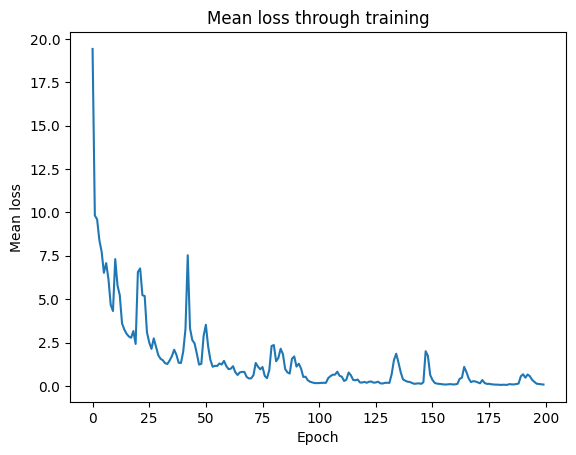

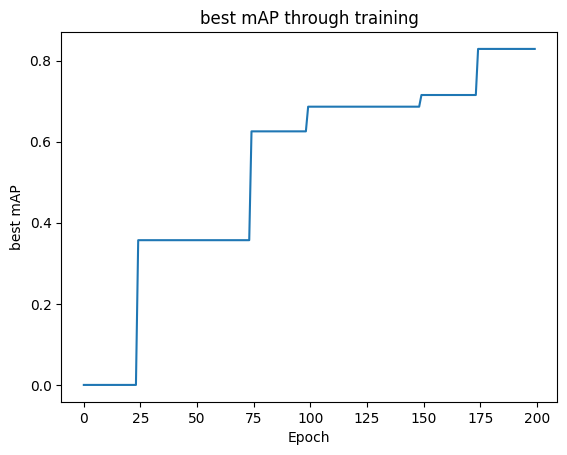

In [12]:
fig = plt.figure()
x = np.arange(len(mean_losses))
plt.plot(x, mean_losses)
plt.title('Mean loss through training')
plt.xlabel('Epoch')
plt.ylabel('Mean loss')
plt.show()

fig = plt.figure()
x = np.arange(len(list_best_mAP))
plt.plot(x, list_best_mAP)
plt.title('best mAP through training')
plt.xlabel('Epoch')
plt.ylabel('best mAP')
plt.show()

# VISUALIZATION

In [ ]:
import cv2
import os
from utils import yolobox_to_realbox, get_list_of_boxes, do_NMS, load_checkpoint

In [19]:
def draw_bounding_boxes(image, bndboxes, with_confidence_score=False):
    """Draw parsing bounding boxes on an image and saves it.
        Args:
            image_path (path): Path to the image.
            bndboxes (list): List of predicted bounding boxes, format: [x, y, w, h, cls, conf].
            with_confidence_score (bool, optional): Show confidence score or not. Defaults is False.
        Returns:
            (Image): The image with drawn bounding boxes.
    """
    # Load the image
    new_image = image.copy()
    image_height, image_width, _ = image.shape
    
    for obj in bndboxes:
        xmin, ymin, xmax, ymax = yolobox_to_realbox(obj[:4], image_width, image_height)
        text = f"{round(obj[4], 2)}" if with_confidence_score else ""
        new_image = cv2.rectangle(new_image, (xmin, ymin), (xmax, ymax), color=(255,0,0), thickness=2)
        new_image = cv2.putText(new_image, text, (xmin, ymin-5), fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                   fontScale=0.5, color=(255,0,0), thickness=2, lineType=cv2.LINE_AA)  
    return new_image


def display_image(image_path, predicted_bndboxes=None, label_path=None):
    """Display an image with optinal predicted bounding boxes and true bounding boxes
    
        Args:
            image_path (Path): Path to image
            predicted_bndboxes (list | np.darray, optinal): 
            label_path (str, optinal): Path to true bounding boxes. Default is None
    """
    # Create a figure for plotting
    image_name = image_path.split('/')[-1]
    fig = plt.figure(figsize=(12, 8))
    num_rows = 1
    num_cols = 3 if (predicted_bndboxes is not None and label_path is not None) else 2  
    
    # Load the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
    
    # Display the original image
    image_index = 1
    ax1 = plt.subplot(num_rows, num_cols, image_index)
    ax1.imshow(image)
    ax1.set_title('Original image')
    
    # Display the predicted bounding boxes
    if predicted_bndboxes is not None:
        image_index += 1
        ax2 = plt.subplot(num_rows, num_cols, image_index)
        predicted_image = draw_bounding_boxes(image, predicted_bndboxes, with_confidence_score=True)
        ax2.imshow(predicted_image)
        ax2.set_title('Prediction')
    
    
    # Display the true bouding boxes
    if label_path is not None:
        image_index += 1
        ax3 = plt.subplot(num_rows, num_cols, image_index)
        
        # Load true bounding boxes from label file
        true_bndboxes = []
        with open(label_path) as label_file:
            for line in label_file.readlines():
                bndbox = list(map(float, line.split()))
                order = [0, 1, 2, 3]
                bndbox = [bndbox[order[i]] for i in range(4)]
                true_bndboxes.append(bndbox)
        
        groundtruth_image = draw_bounding_boxes(image, true_bndboxes, with_confidence_score=False)
        ax3.imshow(groundtruth_image)
        ax3.set_title('Grouth truth')
    fig.tight_layout()
    plt.show()

    
def get_prediction(model, image, threshold, iou_threshold):
    model.eval()
    prediction = model(image)
    prediction = prediction.reshape(1, config.NUM_GRIDS, config.NUM_GRIDS, -1)
    prediction = get_list_of_boxes(prediction, S=config.NUM_GRIDS)
    for i in range(1):
        nms_boxes = do_NMS(prediction[i], threshold=threshold, iou_threshold=iou_threshold)
    model.train()
    return nms_boxes

In [20]:
# Load 
load_checkpoint(torch.load('checkpoint.pth.tar'), model, optimizer)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15340\223257137.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  load_checkpoint(torch.load('checkpoint.pth.tar'), model, opti

=> Loading checkpoint


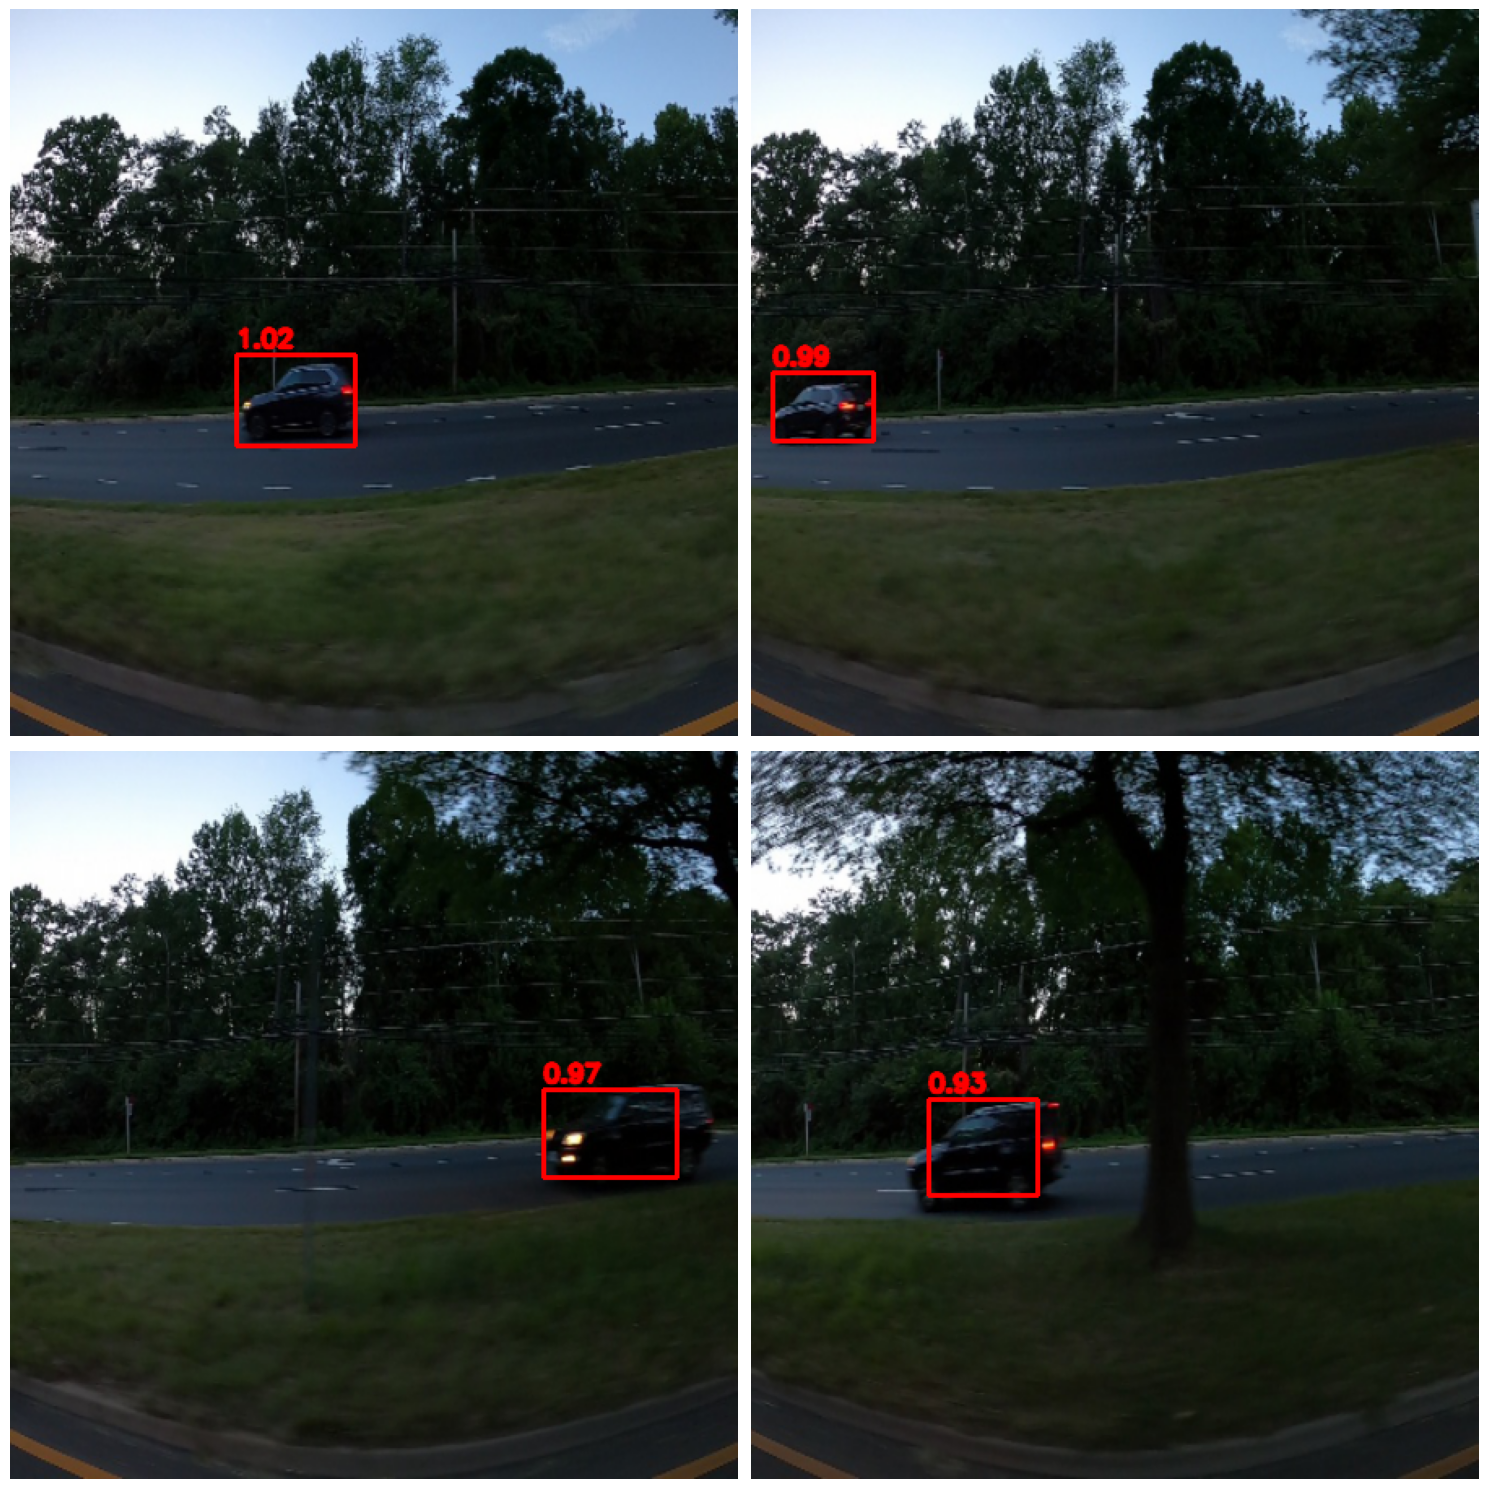

In [30]:
it = iter(test_loader)
# it = iter(train_loader)

for _ in range(9): # batch 9-th
    batch_images, batch_labels = next(it)
    batch_labels = get_list_of_boxes(batch_labels.to(config.DEVICE), S=config.NUM_GRIDS)

fig = plt.figure(figsize=(15, 15))
for i in range(4):  
    image = batch_images[i].to(config.DEVICE)
    boxes = get_prediction(model, image.unsqueeze(0), threshold=0.5, iou_threshold=0.5)
    # boxes = batch_labels[i]
    numpy_image = image.cpu().numpy()
    numpy_image = np.transpose(numpy_image, (1, 2, 0)).astype('uint8')
    numpy_image = np.ascontiguousarray(numpy_image)

    numpy_image = draw_bounding_boxes(numpy_image, boxes, with_confidence_score=True)
    plt.subplot(2, 2, i+1)
    plt.imshow(numpy_image)
    plt.axis('off')
    
plt.tight_layout()
plt.savefig('example.png')
plt.show()